In [48]:
import numpy as np
import networkx as nx
from random import random, shuffle, seed
import matplotlib.pyplot as plt

# 1.1

In [49]:
avg_sp = np.zeros(15)
avg_cc = np.zeros(15)

j = 0
xs = np.logspace(-3.5, 0, num=15)
for p in xs:
    avg_sp_l = np.zeros(20)
    avg_cc_l = np.zeros(20)
    for i in range(20):
        G = nx.watts_strogatz_graph(500, 10, p)
        avg_sp_l[i] = (nx.average_shortest_path_length(G))
        avg_cc_l[i] = (nx.average_clustering(G))
        
    avg_sp[j] = np.average(avg_sp_l)
    avg_cc[j] = np.average(avg_cc_l)
           
    j += 1

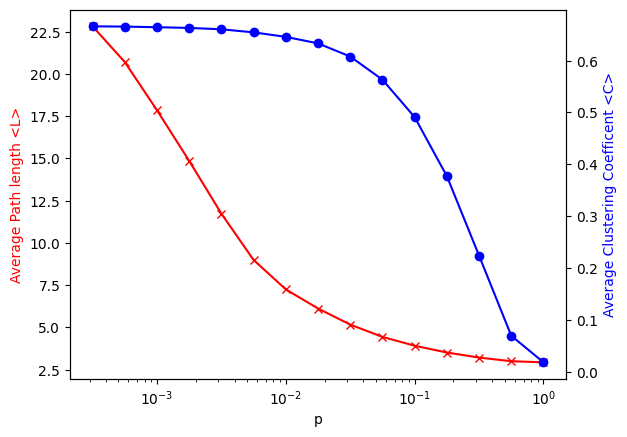

In [50]:
fig, ax1 = plt.subplots()
ax1.set_xscale('log')
ax1.set_ylabel('Average Path length <L>', color='red')
ax1.set_xlabel('p')
ax2 = ax1.twinx()
ax2.set_ylabel('Average Clustering Coefficent <C>', color='blue')
ax1.plot(xs, avg_sp, marker='x', color='red')
ax2.plot(xs, avg_cc, marker='o', color='blue')

# 1.2

In [51]:
    
distros = []

j = 0
ps = [0.0001, 0.001, 0.01, 0.1, 1]
for p in ps:
    avg_sp_l = np.zeros(20)
    avg_cc_l = np.zeros(20)
    
    G = nx.watts_strogatz_graph(1000, 50, p)
    degree_sequence = sorted((d for n, d in G.degree()), reverse=True)
    
    distros.append(degree_sequence)

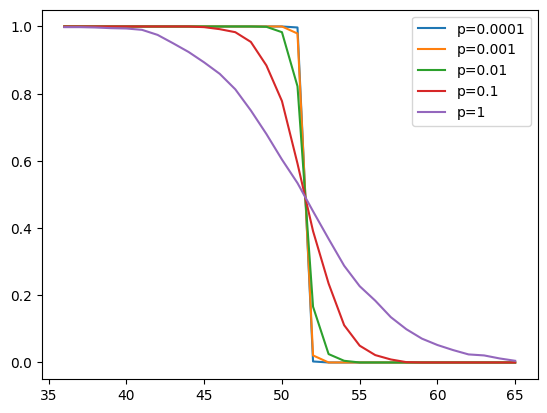

In [52]:

fig, ax1 = plt.subplots()
labels = []

i = 0
for distro in distros:

    ys, xs = np.histogram(distro, bins=np.linspace(35, 65, num=31))
    ys = np.cumsum(ys[::-1])[::-1] / 1000
    ax1.plot(xs[1:], ys)
    
    labels.append('p=' + str(ps[i]))
    i += 1
    
ax1.legend(labels)

# 1.3

- **local clustering** The model retains short average path lengths, while clustering is relatively high. (As seen in task 1.1)
- **hub formation** The degree distribution follows a power law, which means its scale free as observed in many real world networks. (As seen in task 1.2)
